Health and Nutrition Data Analysis

-study trends in obesity, malnutrition and diseases

-visualize health metrics using stacked bar plots and geographical maps

In [ ]:
install.packages("readxl")
install.packages("tidyverse")
install.packages("maps")

library(readxl)
library(tidyr)
library(dplyr)
library(ggplot2)
library(maps)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Load Data
data <- read_excel("/content/global_nutrition_health_data.xlsx", sheet = "Country child nutrition")

In [ ]:
# Reshape Data
long_data <- data %>%
  pivot_longer(
    cols = starts_with("stunting_"):starts_with("lbw_"),
    names_to = c("metric", "year"), names_sep = "_",
    values_to = "value"
  )

long_data$year <- as.numeric(long_data$year)

# Trend Analysis
trend_data <- long_data %>%
  group_by(year, metric) %>%
  summarize(avg_value = mean(value, na.rm = TRUE))

Warning message in x:y:
“numerical expression has 21 elements: only the first used”
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
ERROR while rich displaying an object: Error in `geom_polygon()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'stunting' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No 

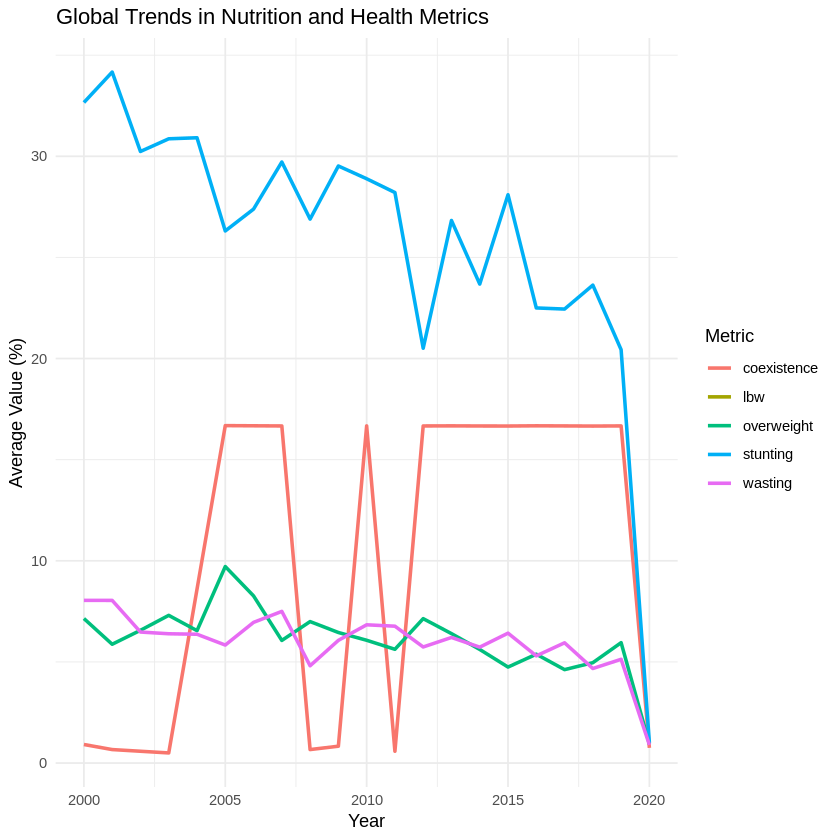

In [ ]:
# Plot Trends
ggplot(trend_data, aes(x = year, y = avg_value, color = metric, group = metric)) +
  geom_line(size = 1) +
  labs(
    title = "Global Trends in Nutrition and Health Metrics",
    x = "Year",
    y = "Average Value (%)",
    color = "Metric"
  ) +
  theme_minimal()

# World Map Data
world_map <- map_data("world")
map_data <- data %>%
  select(iso3, country, stunting_2020) %>%
  rename(stunting = stunting_2020)
map_data$stunting <- as.numeric(map_data$stunting)

# Plot Map
ggplot(world_map, aes(long, lat, group = group, fill = stunting)) +
  geom_polygon(color = "white") +
  scale_fill_gradientn(
    colors = c("yellow", "red"),
    na.value = "grey50"
  ) +
  labs(title = "Global Stunting Prevalence (2020)", fill = "Stunting (%)") +
  theme_void()

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.
Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_bar()`).”


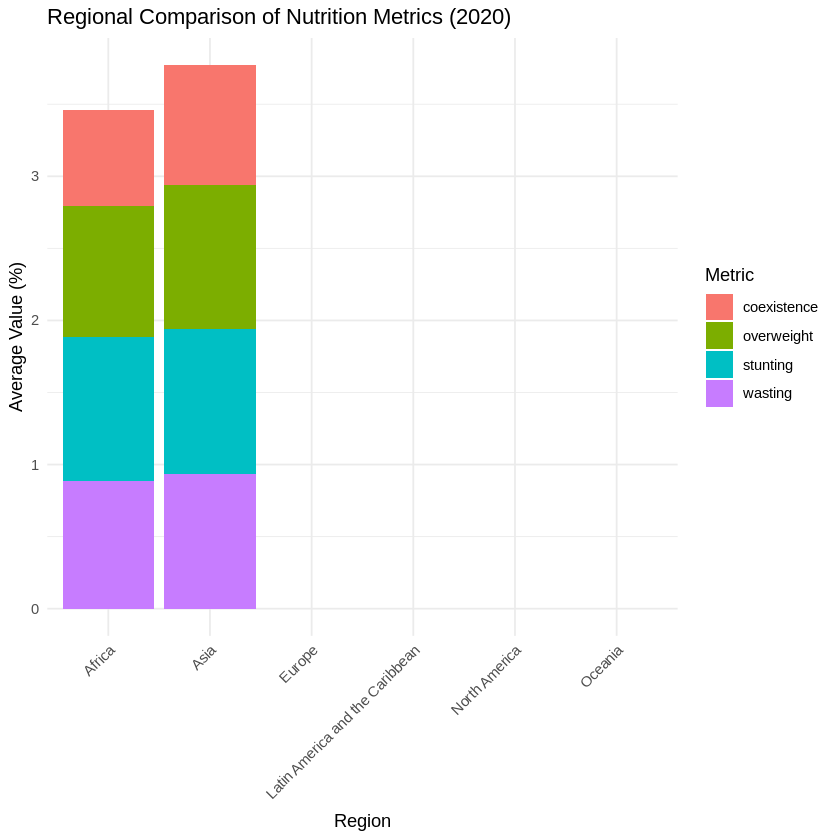

In [ ]:
# Regional Bar Chart
bar_data <- long_data %>%
  filter(year == 2020) %>%
  group_by(region, metric) %>%
  summarize(avg_value = mean(value, na.rm = TRUE))

ggplot(bar_data, aes(x = region, y = avg_value, fill = metric)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Regional Comparison of Nutrition Metrics (2020)",
    x = "Region",
    y = "Average Value (%)",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))